# **Import Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Upload Data Set**

In [40]:
# Uploading file
from google.colab import files
uploaded = files.upload()

# **Read CSV**

In [41]:
df = pd.read_csv("summer.csv")

# **Show Data**

In [42]:
df 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


# **1. In how many cities Summer Olympics is held so far?**

In [45]:
Total_cities = len(df['City'].unique())
Total_cities

22

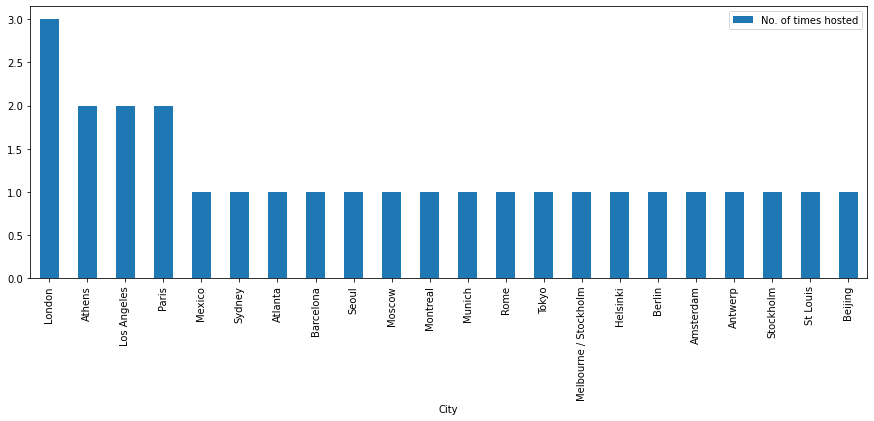

In [46]:
data = []

for city in df['City'].unique():
    host_count = 0
    for year in df['Year'].unique():
        if len(df[(df['City'] == city) & (df['Year'] == year)]) > 0:
            host_count += 1
    data.append([city, host_count])

plot_data = pd.DataFrame(data,columns = ['City','No. of times hosted']).sort_values(by='No. of times hosted', ascending = False)
plot_data.plot(x = 'City', y = 'No. of times hosted', kind = 'bar', figsize = (15,5))

# **2. Which Sport is having most number of Gold Medals so far? (Top 5)**

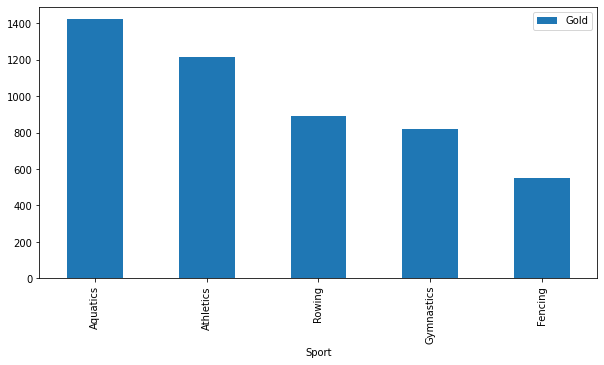

In [47]:
gold = df[df['Medal'] == 'Gold']

data = []
for sport in gold['Sport'].unique():
    data.append([sport, len(gold[gold['Sport'] == sport])])

data = pd.DataFrame(data, columns = ['Sport', 'Gold']).sort_values(by='Gold', ascending = False).head()
data.plot(x='Sport', y='Gold', kind='bar', figsize=(10,5))

# **3. Which sport is having most number of medals so far? (Top 5)**

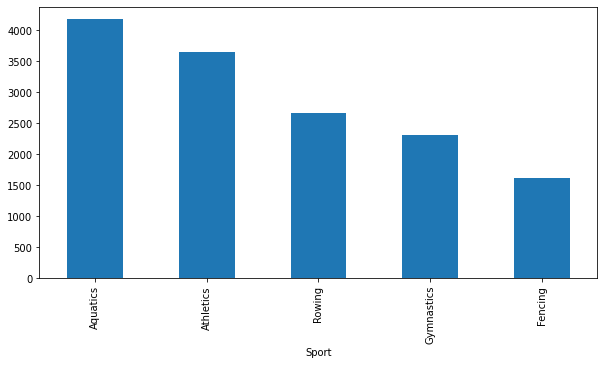

In [48]:
df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))

# **4. Which player has won most number of medals? (Top 5)**

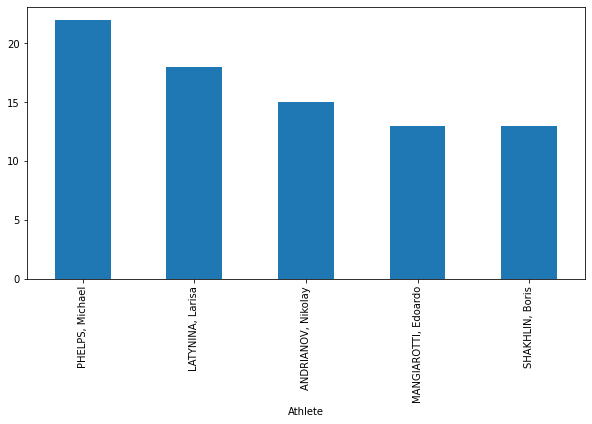

In [49]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10,5))

# **5. Which player has won most number Gold Medals of medals? (Top 5)**

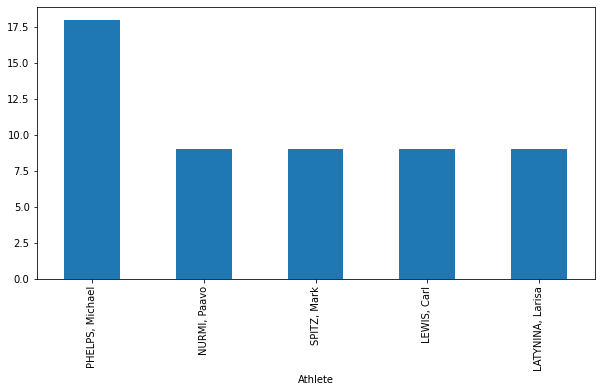

In [50]:
gold= df[df['Medal']=='Gold']
gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(10, 5))

# **6. In which year India won first Gold Medal in Summer Olympics?**

In [51]:
gold[gold['Country'] == 'IND']['Year'].min()

1928

# **7. Which event is most popular in terms on number of players? (Top 5)**

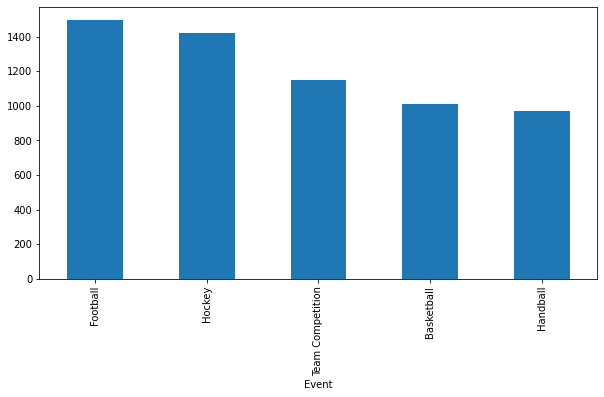

In [52]:
popular_event = df.groupby("Event").count()['Athlete'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))

# **8. Which sport is having most female Gold Medalists? (Top 5)**

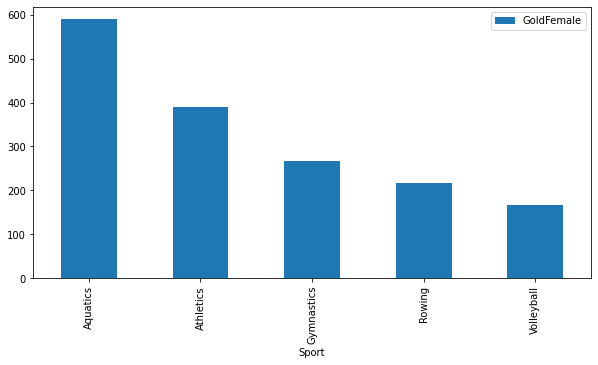

In [53]:
gold_female = gold[gold['Gender'] == 'Women']

data = []
for sport in gold_female['Sport'].unique():
    data.append([sport, len(gold_female[gold_female['Sport']== sport])])
    
data = pd.DataFrame(data, columns=['Sport', 'GoldFemale']).sort_values(by = 'GoldFemale', ascending = False).head()
data.plot(x='Sport', y='GoldFemale', kind='bar', figsize=(10,5))